Swiss Temperature Data
---

In this exercise we use [Swiss temperature data](https://www.meteoswiss.admin.ch/home/climate/swiss-climate-in-detail/Swiss-temperature-mean/Data-on-the-Swiss-temperature-mean.html) which describes the average temperature measured across various altitudes in Switzerland. The measurement has been available in monthly frequency since 1864 and is continuously updated with the most recent values. The objective is to explore the application of `period_range` with real data.


Create a date column with `period_range`  by going through the following steps:

1. Load the data from the file `10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt` in the Resource tab into a dataframe using the `time` column as the index. Check the shape and the data in order to answer the following __questions__. 

    - Are all years from 1864 to 2020 present in the data?
    - Are all months present in the data? 

__Remark__: If you open the txt file in a text editor or JupyterLab you can see that the actual table with the data is preceded by a few lines of meta data. The parameter `skiprows` in the `read_csv()` function might help.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt',index_col='time',sep='\t',skiprows=15)

# Print the shape of the dataframe
print('Data shape: {}\n'.format(data.shape))

print('First 5 years')
display(data.head())

print('Last 5 years')
display(data.tail())

Data shape: (157, 19)

First 5 years


,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,djf,mam,jja,son,winter,summer,year
time,,,,,,,,,,,,,,,,,,,
1864,-7.10,-4.52,0.04,2.11,7.43,9.48,12.37,10.95,8.59,3.50,-0.51,-4.47,NaN,3.19,10.93,3.86,NaN,8.49,3.16
1865,-3.47,-6.25,-5.91,7.03,10.09,10.98,13.99,11.16,11.90,5.19,1.26,-3.07,-4.73,3.74,12.04,6.12,-2.85,10.86,4.41
1866,-1.31,-0.42,-1.00,4.11,4.95,12.02,12.25,9.98,9.70,5.34,-0.20,-0.49,-1.60,2.69,11.42,4.95,0.11,8.84,4.58
1867,-3.87,0.56,-0.13,3.49,7.74,10.57,11.29,12.93,10.43,2.92,-1.43,-5.80,-1.27,3.70,11.60,3.97,0.20,9.41,4.06
1868,-5.46,-1.53,-2.30,2.33,12.04,11.97,12.89,12.50,11.12,4.76,-1.98,1.27,-4.26,4.02,12.45,4.63,-2.27,10.47,4.80


Last 5 years


,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,djf,mam,jja,son,winter,summer,year
time,,,,,,,,,,,,,,,,,,,
2016,-1.10,-0.19,0.14,4.57,7.88,11.97,15.09,14.80,12.54,5.38,1.82,-0.11,0.32,4.19,13.95,6.58,1.87,11.14,6.07
2017,-5.15,0.46,4.11,4.42,9.80,15.18,15.05,15.45,8.65,7.78,0.88,-2.43,-1.60,6.11,15.23,5.77,1.09,11.43,6.18
2018,0.48,-5.21,-0.21,7.81,10.43,13.81,16.24,15.89,12.56,8.04,2.79,-0.11,-2.39,6.01,15.31,7.80,0.21,12.79,6.88
2019,-4.37,0.73,2.27,4.47,6.08,15.25,16.21,15.10,11.37,8.45,1.51,0.78,-1.25,4.27,15.52,7.11,1.56,11.42,6.49
2020,-0.28,1.62,1.53,7.62,9.53,11.82,15.40,15.20,NaN,NaN,NaN,NaN,0.71,6.23,14.14,NaN,2.27,NaN,NaN


__Answers__:
- Yes, there are 157 rows representing yearly data from 1864 to 2020.
- We can see that the data stops after August 2020.

2. Select all the columns containing monthly data.

In [2]:
# Select the first 12 columns
data_m = data.loc[:,'jan':'dec']
data_m.head()

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
time,,,,,,,,,,,,
1864,-7.10,-4.52,0.04,2.11,7.43,9.48,12.37,10.95,8.59,3.50,-0.51,-4.47
1865,-3.47,-6.25,-5.91,7.03,10.09,10.98,13.99,11.16,11.90,5.19,1.26,-3.07
1866,-1.31,-0.42,-1.00,4.11,4.95,12.02,12.25,9.98,9.70,5.34,-0.20,-0.49
1867,-3.87,0.56,-0.13,3.49,7.74,10.57,11.29,12.93,10.43,2.92,-1.43,-5.80
1868,-5.46,-1.53,-2.30,2.33,12.04,11.97,12.89,12.50,11.12,4.76,-1.98,1.27


3. We would like to build a new __dataframe__ with new __index__ and __columns__ 'Year', 'Month' and 'Temp', where each row represents a month:
    - use `stack()` to create the new dataframe (see the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html)  and examples therein). `stack()`  is a useful function for recreating dataframes and integrates the columns as part of the index. In fact, we get a multiIndex dataframe with the year as level=0 and the month as level=1.
    - reset the index of the new dataframe.
    - finally, give new names to the columns of the dataframe (see [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) for how to change the name of columns).
    <br>You can do these three steps together in a single line or separately.

In [3]:
# Put the temperature values in a single chronologicaly ordered column
df=data_m.stack().reset_index().rename(columns={0:'Temp','time':'Year','level_1':'Month'})

Let's check the head of the final dataframe:

In [4]:
df.head()

,Year,Month,Temp
0,1864,jan,-7.10
1,1864,feb,-4.52
2,1864,mar,0.04
3,1864,apr,2.11
4,1864,may,7.43


4.  Create a date column `df['Date']` using `period_range`. Note that `period_range` requires setting several parameters. In particular, of the three parameters `start`, `end`, and `periods` exactly two must be specified. Finally, you need to specify the frequency parameter `freq`. Your data are in monthly frequency and you can find the appropriate frequency strings from [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
<br>You should set the `start` to be the first month e.g. '1864-jan'. You can ignore the end but then you have to specify the number of `periods`, here total number of months.

In [5]:
# create dates
df['Date']=pd.period_range('1864-jan', periods=df.shape[0], freq='M')

df.head()

,Year,Month,Temp,Date
0,1864,jan,-7.10,1864-01
1,1864,feb,-4.52,1864-02
2,1864,mar,0.04,1864-03
3,1864,apr,2.11,1864-04
4,1864,may,7.43,1864-05


5. Set the `Date` column as your new index.

In [6]:
# set the Date to be the index of the dataframe
df.set_index('Date',inplace=True)

df.head()

,Year,Month,Temp
Date,,,
1864-01,1864,jan,-7.10
1864-02,1864,feb,-4.52
1864-03,1864,mar,0.04
1864-04,1864,apr,2.11
1864-05,1864,may,7.43


6. Finally plot the monthly temperatures. You should get the following plot:

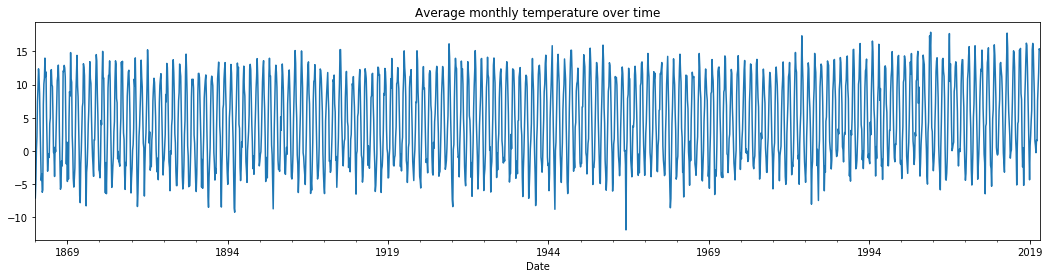

In [7]:
df.Temp.plot(figsize=(18, 4))
plt.title('Average monthly temperature over time')
plt.show()

__Question__: What can you observe in this plot? What is hard to observe from the current plot?

__Answer__: 
There is a cyclical trend in the monthly temperatures. The repetitive peaks show the month with highest temperature at each year (often July) and the repetitive minimum values show the month with the lowest temperature each year (often January). However, it is not possible to see the changes within each year and difficult to see changes within and also over decades.

You might have noticed that the plot with monthly temperature is not very informative to see the trend of the temperature over the last two centuries. It will be easier to look at the average annual temperature.

7. Use `groupby()` to calculate the average annual temperatures and plot them over time.

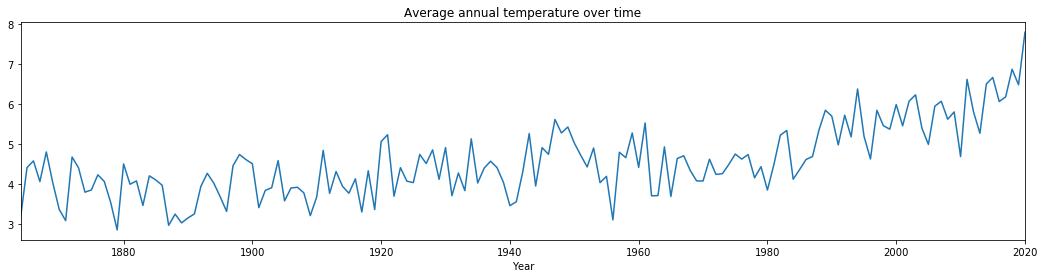

In [8]:
df.groupby('Year')['Temp'].mean().plot(figsize=(18, 4))
plt.title('Average annual temperature over time')
plt.show()

__Questions__: 
- If you consider the average annual temperature decade by decade, what do you observe?
- What do you observe if you compare the data of the first 100 years with the data of the last 50 years?

__Answers__: 
- We can observe the up and downs within each decade.
- The data of the first 100 years varies around the 4 degree mark, but is steay over time. In contrast, we can see an upward trend over the last 50 years.

****
__The case of missing values in the data__: 
Note that we could use  `period_range` easily as described above because we already knew that there is no missing month in the data. However, in case a month is missing the entire row will be dropped out when we stack the data which makes our final column `Date` misaligned (try this by deleting a value from the original data set and go through the steps and see the difference). There are two solutions (see below) when we know that there might be missing values in the data set:

- In step 3, set `dropna=False` when you stack the data `data_m.stack(dropna=False)`, and follow the next steps. By this we tell the stack function to keep the column with the missing value and let it to appear as a row with `NaN` value.
- In step 4, instead of using `period_range` to create dates, define a date column by using `df['Date']  = df['Year'].astype('str')+'-'+df['Month']`, and follow the next steps. 

In the first solution, the temporal order of the data remains in place and missing values appear as `NaN`s in front of their corresponding dates and you can see the gaps in the plot. However, in the second solution the chronological order of data will change in the sense that the months with missing temperature will not appear in the data and the plot.